## This is the Jupyter notebook with python code to load in the preprocessed response time data, to create the figures in the manuscript, and to create a .csv file for further statistical analysis in MATLAB. 

#BSD-3 License

### import necessary packages

In [1]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

sns.set_context("poster") # this makes things large 

%matplotlib inline

In [2]:
### decide whether or not to save figures and data for MATLAB

saveFig = False
saveMat = False

In [3]:
### import the .mat data files


#mat1 = loadmat('a1355e_Priming_block_3.mat',squeeze_me=1)
#mat2 = loadmat('a1355e_Priming_block_4',squeeze_me=1)


mat1 = loadmat('a1355e_priming_behavior_block_1.mat',squeeze_me=1)
mat2 = loadmat('a1355e_priming_behavior_block_2.mat',squeeze_me=1)


In [4]:
### extract variables of interest
### respLo = the minimum response time
### respHi = the maximum response time

respLo = 150 # minimum response time - 150 ms
respHi = 1000 # maximum response time - 1000 ms

button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']


In [5]:
### prepare for pandas data frame


a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}
a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}


In [6]:
### make pandas dataframes

dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')


In [7]:
### assign columns for dataframes


dataFdict1.columns = ['Constant Train','High Initial Pulses']
dataFdict2.columns = ['Constant Train','High Initial Pulses']


dataMelt1 = pd.melt(dataFdict1)
#dataMelt1['Subject'] = 'a1355e'
dataMelt1['Subject'] = '1'
dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
#dataMelt2['Subject'] = 'a1355e'
dataMelt2['Subject'] = '1'
dataMelt2['block'] = '2'
dataMelt1.rename(columns = {'variable':'Experiment','value':'Response Time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'Experiment','value':'Response Time (ms)'}, inplace = True)


In [8]:
### concatenate

frames = [dataMelt1,dataMelt2]

result = pd.concat(frames)
result
resultTrim = result[(result['Response Time (ms)'] < respHi) & (result['Response Time (ms)'] > respLo)]
resultTrim.groupby(['Experiment','Subject','block']).mean()

experimentsOfInt =  ['Constant Train','High Initial Pulses']

In [9]:
### look at various metrics of interest


dataCleaned = resultTrim[resultTrim['Experiment'].isin(experimentsOfInt)]
dataCleaned.groupby(['Experiment','Subject','block']).mean()
dataCleaned.groupby(['Experiment','Subject','block']).describe()
dataCleaned.groupby(['Subject','Experiment']).describe().round()

#dataCleaned.groupby(['Subject','experiment']).mean()
#dataCleaned.groupby(['Subject','experiment']).std()

# get counts of each type
#dataCleaned.groupby(['Subject','experiment']).count()

Response Time (ms)                              \
                                         count   mean    std    min    25%   
Subject Experiment                                                           
1       Constant Train                    21.0  478.0  101.0  297.0  428.0   
        High Initial Pulses               21.0  444.0  145.0  214.0  370.0   

                                                  
                               50%    75%    max  
Subject Experiment                                
1       Constant Train       473.0  527.0  763.0  
        High Initial Pulses  414.0  461.0  834.0

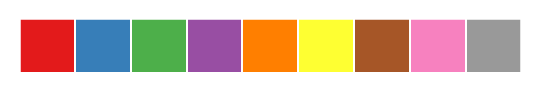

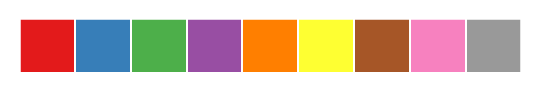

In [10]:
# set the color palette 

color_pal=sns.choose_colorbrewer_palette('qualitative')

#use set 1

# observe color palette 

sns.palplot(color_pal)
color_pal_3 = color_pal[0:4]
color_pal_2 = color_pal[3:5]
color_pal_2_v2 = color_pal[6:8]

No handles with labels found to put in legend.


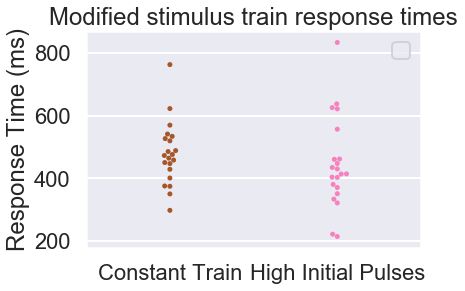

In [11]:
figPrime = sns.swarmplot(x="Experiment",y="Response Time (ms)",data=dataCleaned,palette=color_pal_2_v2)
figPrime.set_title('Modified stimulus train response times')
figPrime.set_xlabel('')
figPrime.legend()

<Figure size 288x288 with 0 Axes>

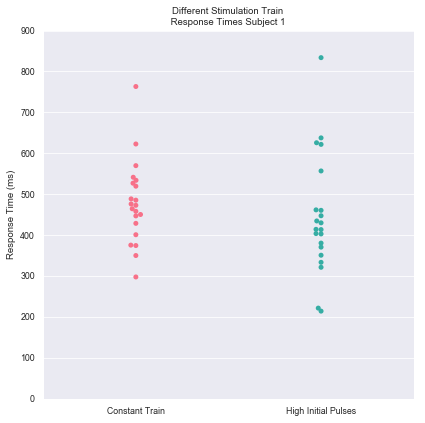

In [20]:
### use the "data cleaned" variable from above to make the individual subject plot

plt.figure(figsize=(4,4))
plt.tight_layout()

sns.set_context("paper")

frameIndividual = sns.FacetGrid(data=dataCleaned,col='Subject',height=6, aspect=1,sharex=False,sharey=True)
#frameIndividual.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frameIndividual.map(sns.swarmplot,"Experiment","Response Time (ms)",palette='husl',order = ['Constant Train','High Initial Pulses'])
frameIndividual.axes[0,0].set_xlabel('')

#dataCleaned['typeOrder']
figIndividual = plt.gcf()
plt.ylim([0,900])

frameIndividual.axes[0,0].set_title('Different Stimulation Train \n Response Times Subject 1 ')

if saveFig:
    figIndividual.savefig('a1355e_priming_RT_CP.svg', dpi=600,bbox_inches='tight')
    figIndividual.savefig('a1355e_priming_RT_CP.png', dpi=600,bbox_inches='tight')


In [21]:
dataCleaned

,Experiment,Response Time (ms),Subject,block
0,Constant Train,569.54880,1,1
4,Constant Train,519.33184,1,1
5,Constant Train,450.06848,1,1
7,Constant Train,375.15264,1,1
9,Constant Train,541.12256,1,1
11,Constant Train,485.13024,1,1
12,Constant Train,526.62272,1,1
14,Constant Train,622.51008,1,1
15,High Initial Pulses,413.16352,1,1
16,High Initial Pulses,380.10880,1,1


In [25]:
from scipy.stats.mstats import kruskalwallis

'Constant Train','High Initial Pulses'

priming = dataCleaned[(dataCleaned.Subject == '1') & (dataCleaned.Experiment == 'High Initial Pulses')]['Response Time (ms)'].dropna()
noPriming = dataCleaned[(dataCleaned.Subject == '1') & (dataCleaned.Experiment == 'Constant Train')]['Response Time (ms)'].dropna()
scipy.stats.kruskal(priming,noPriming)


KruskalResult(statistic=1.949216896060733, pvalue=0.16267126262868642)

### check normality

In [30]:
data = dataCleaned.dropna()

groupedData = data.groupby(['Experiment'])

groupedData.apply(lambda x: scipy.stats.anderson((x['Response Time (ms)']),dist='norm'))

import statsmodels.api as sm
groupedData.apply(lambda x: sm.stats.diagnostic.normal_ad((x['Response Time (ms)'])))




Experiment
Constant Train         (0.38507980030714606, 0.36095825095384915)
High Initial Pulses      (0.6870515792738026, 0.0620842337707819)
dtype: object

In [31]:
groupedData.apply(lambda x: sm.stats.diagnostic.kstest_normal(x['Response Time (ms)'], dist='norm', pvalmethod='approx'))


Experiment
Constant Train                          (0.1268587802000184, 0.2)
High Initial Pulses    (0.21500911156846692, 0.01230882130441606)
dtype: object

In [32]:
scipy.stats.levene(data['Response Time (ms)'][data.Experiment=='High Initial Pulses'],data['Response Time (ms)'][data.Experiment=='Constant Train'])

LeveneResult(statistic=1.0999067944143952, pvalue=0.3005822378134691)